In [9]:
from Bio import PDB
from Bio.PDB.Structure import Structure
from Bio.PDB.vectors import calc_dihedral
import matplotlib.pyplot as plt
from get_structure import get_structure

In [10]:
structure = get_structure("4YWO")

Structure exists: './tmp/pdb4ywo.ent' 


In [11]:
def calculate_phi_psi(structure: Structure) -> list:
    phi_psi_angles = []
    
    for model in structure:
        for chain in model:
            residues = list(chain)
            
            for i in range(1, len(residues)-1):
                prev_res = residues[i-1]
                curr_res = residues[i]
                next_res = residues[i+1]
                
                try:
                    phi_atoms = [
                        prev_res['C'],
                        curr_res['N'],
                        curr_res['CA'],
                        curr_res['C']
                    ]
                    
                    psi_atoms = [
                        curr_res['N'],
                        curr_res['CA'],
                        curr_res['C'],
                        next_res['N']
                    ]
                    
                    phi = calc_dihedral(*[atom.get_vector() for atom in phi_atoms])
                    psi = calc_dihedral(*[atom.get_vector() for atom in psi_atoms])
                    
                    phi_psi_angles.append((phi, psi))
                    
                except KeyError:
                    continue
                    
    return phi_psi_angles

In [12]:
def plot_ramachandran(phi_psi_angles: list[tuple[float, float]]):
    phi, psi = zip(*phi_psi_angles)
    plt.scatter(phi, psi, s=1)
    plt.xlim(-180, 180)
    plt.ylim(-180, 180)
    plt.xlabel("Phi")
    plt.ylabel("Psi")
    plt.title("Ramachandran plot")
    plt.show()

In [13]:
phi_psi = calculate_phi_psi(structure)

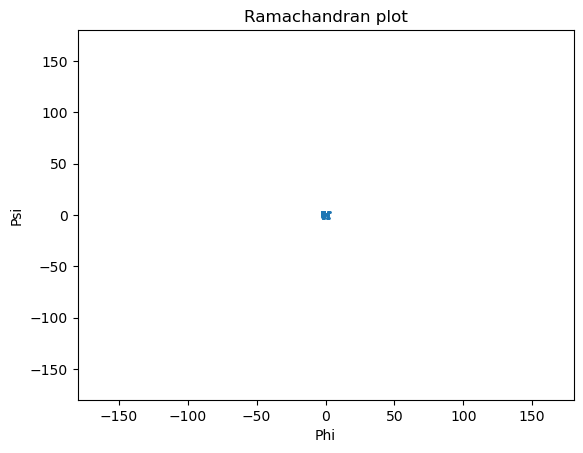

In [14]:
plot_ramachandran(phi_psi)